In [1]:
!pip install eli5==0.13.0


In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/Users/chung/Library/Fonts/NanumGothic.otf', 
    name='NanumGothic')                     
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가 (0,fe):가장 우선순위로 추가하겠다는 뜻
plt.rcParams.update({'font.size': 11, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rc('font', family='NanumGothic')
import seaborn as sns

In [3]:
# utils
import pandas as pd
import numpy as np

## concat (train + test)

In [4]:
pd.set_option('display.max_columns', None)   # 컬럼 모두 보이기
pd.set_option('display.max_colwidth', None)  # 컬럼명 길어도 다 보이기

# 필요한 데이터를 load. 경로는 환경에 맞게 지정한다.
train_path = '/Users/chung/JupyterNotebook/ML 경진대회/data/train.csv'
test_path  = '/Users/chung/JupyterNotebook/ML 경진대회/data/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)


/var/folders/4p/hmdj4xxd5pq0wsbrrldmys4c0000gn/T/ipykernel_82987/1178692829.py:7: DtypeWarning: Columns (16,17,36) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv(train_path)


In [5]:
# train/test 구분을 위한 칼럼을 하나 만들어 줍니다.
dt['data_type'] = 'train'
dt_test['data_type'] = 'test'

concat = pd.concat([dt, dt_test])     # 하나의 데이터로 만들어줍니다.

In [6]:
concat.head(2)


,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,도로명,해제사유발생일,등기신청일자,거래유형,중개사소재지,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,단지소개기존clob,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-전체세대수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-연면적,k-주거전용면적,k-관리비부과면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-135㎡초과,k-홈페이지,k-등록일자,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,data_type
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,train
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,22,4,1987,언주로 3,NaN,,-,-,아파트,025776611,025776673,NaN,분양,자치관리,계단식,개별난방,8.0,270.0,우성건설,모름,1987-11-21 00:00:00.0,22637.0,20204.0,22637.0,20.0,250.0,0.0,NaN,NaN,2022-11-09 20:10:43.0,2023-09-23 17:21:41.0,NaN,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,123500.0,train


## Data processing

In [7]:
import numpy as np
import pandas as pd

# 원본 concat은 절대 수정하지 않고, 복사본 생성
concat_clean = concat.copy()

# 복사본에서 값 수정 (원본 건드리지 않음)
concat_clean['등기신청일자'] = concat_clean['등기신청일자'].replace(' ', np.nan)
concat_clean['거래유형'] = concat_clean['거래유형'].replace('-', np.nan)
concat_clean['중개사소재지'] = concat_clean['중개사소재지'].replace('-', np.nan)

print("\n" + "="*80 + "\n") 

# 결측치 기준으로 컬럼 나누기 (복사본 사용)
low_null_cols = list(concat_clean.columns[concat_clean.isnull().sum() <= 1000000])
high_null_cols = list(concat_clean.columns[concat_clean.isnull().sum() > 1000000])

print("\033[31m* 결측치가 100만개 이하인 변수들 :\033[0m", low_null_cols)
print("\n\n")
print("\033[31m* 결측치가 100만개 이상인 변수들 :\033[0m", high_null_cols)

print("\n" + "="*80 + "\n") 

# 결측치 적은 컬럼들만 다시 복사 (여기서 진짜 concat_select 생성)
concat_select = concat_clean[low_null_cols].copy()




* 결측치가 100만개 이하인 변수들 : ['시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층', '건축년도', '도로명', 'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', 'k-세대타입(분양형태)', 'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)', 'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적', 'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하', 'k-수정일자', '고용보험관리번호', '경비비관리형태', '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일', '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', 'data_type']



* 결측치가 100만개 이상인 변수들 : ['해제사유발생일', '등기신청일자', '거래유형', '중개사소재지', '단지소개기존clob', 'k-135㎡초과', 'k-홈페이지', 'k-등록일자']




In [8]:
concat_select['본번'] = concat_select['본번'].apply(str)
concat_select['부번'] = concat_select['부번'].apply(str)

# 연속형 / 범주형 자동 분리
continuous_columns = concat_select.select_dtypes(include=['number']).columns.tolist()
categorical_columns = concat_select.select_dtypes(exclude=['number']).columns.tolist()

# 보기 좋은 출력
print("📌 연속형 변수:")
for col in continuous_columns:
    print(" -", col)

print("\n📌 범주형 변수:")
for col in categorical_columns:
    print(" -", col)


📌 연속형 변수:
 - 전용면적(㎡)
 - 계약년월
 - 계약일
 - 층
 - 건축년도
 - k-전체동수
 - k-전체세대수
 - k-연면적
 - k-주거전용면적
 - k-관리비부과면적
 - k-전용면적별세대현황(60㎡이하)
 - k-전용면적별세대현황(60㎡~85㎡이하)
 - k-85㎡~135㎡이하
 - 건축면적
 - 주차대수
 - 좌표X
 - 좌표Y
 - target

📌 범주형 변수:
 - 시군구
 - 번지
 - 본번
 - 부번
 - 아파트명
 - 도로명
 - k-단지분류(아파트,주상복합등등)
 - k-전화번호
 - k-팩스번호
 - k-세대타입(분양형태)
 - k-관리방식
 - k-복도유형
 - k-난방방식
 - k-건설사(시공사)
 - k-시행사
 - k-사용검사일-사용승인일
 - k-수정일자
 - 고용보험관리번호
 - 경비비관리형태
 - 세대전기계약방법
 - 청소비관리형태
 - 기타/의무/임대/임의=1/2/3/4
 - 단지승인일
 - 사용허가여부
 - 관리비 업로드
 - 단지신청일
 - data_type


In [9]:
#범주형 변수 결측치 처리 

concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

In [10]:
# 우선 제거 대상 변수
remove_cols = ['k-관리비부과면적', 'k-전체세대수', 'k-연면적']

# 제거 적용
reduced_data = concat_select.drop(columns=remove_cols)

print("✅ 제거된 변수:", remove_cols)
print("✅ 제거 후 컬럼 수:", reduced_data.shape[1])

✅ 제거된 변수: ['k-관리비부과면적', 'k-전체세대수', 'k-연면적']
✅ 제거 후 컬럼 수: 42


In [11]:
# 보간 대상 변수 목록
interpolate_cols = ['k-전체동수', 'k-주거전용면적', '주차대수','건축면적']

# 선형 보간 적용 (각 컬럼별로 독립적으로)
for col in interpolate_cols:
    reduced_data[col] = reduced_data[col].interpolate(method='linear', limit_direction='both')

# 결측치 확인
missing_after = reduced_data[interpolate_cols].isnull().sum()
print("✅ 선형 보간 후 결측치:\n", missing_after)


✅ 선형 보간 후 결측치:
 k-전체동수      0
k-주거전용면적    0
주차대수        0
건축면적        0
dtype: int64


In [12]:
# 결측 → 0으로 처리할 변수 리스트
zero_fill_cols = [
    'k-전용면적별세대현황(60㎡이하)',
    'k-전용면적별세대현황(60㎡~85㎡이하)',
    'k-85㎡~135㎡이하'
]

# 결측치 → 0으로 채우기 (inplace 적용)
reduced_data[zero_fill_cols] = reduced_data[zero_fill_cols].fillna(0)

# 적용 결과 확인 (선택)
print(reduced_data[zero_fill_cols].isnull().sum())

k-전용면적별세대현황(60㎡이하)        0
k-전용면적별세대현황(60㎡~85㎡이하)    0
k-85㎡~135㎡이하              0
dtype: int64


### 추가된 과정 (07.10 목)

In [13]:
#  모든 컬럼의 결측치 개수 확인
missing_summary = reduced_data.isnull().sum()

# 결측치가 1개라도 존재하는 컬럼만 필터링
missing_columns = missing_summary[missing_summary > 0].sort_values(ascending=False)

# 출력 (가독성)
print("\n📌 결측치가 존재하는 컬럼 목록 및 결측치 개수:")
for col, missing_count in missing_columns.items():
    print(f" - {col}: {missing_count}개")

# 결측치가 존재하는 컬럼 리스트만 뽑고 싶다면
missing_cols_list = missing_columns.index.tolist()


📌 결측치가 존재하는 컬럼 목록 및 결측치 개수:
 - 좌표X: 876232개
 - 좌표Y: 876232개
 - target: 9272개


In [14]:
# 1. 데이터 불러오기
seoul_apt = pd.read_csv('서울시 공동주택 아파트 정보.csv', encoding='cp949')

# 2. 도로명 + 상세주소 합치기 → '도로명 주소' 컬럼 생성
seoul_apt['도로명'] = seoul_apt['주소(도로명)'].astype(str).str.strip() + ' ' + seoul_apt['주소(도로상세주소)'].astype(str).str.strip()

# 3. 필요한 컬럼만 추출
seoul_apt = seoul_apt[['도로명', '좌표X', '좌표Y']]

# 4. 결과 확인 (선택)
print(seoul_apt.head())

            도로명          좌표X        좌표Y
0        서달로 83  126.9596386  37.500668
1     송파대로8길 10  127.1291789  37.476897
2    양재대로72길 20  127.1287745  37.508906
3  고척로21나길 85-6  126.8406749  37.501162
4     월계로53길 21  127.0582196  37.631732


외부 데이터 역시 info로 정확히 확인했어야함. - 확인 놓쳐서 문제가 있었음

In [21]:
print(seoul_apt[['좌표X', '좌표Y']].dtypes)

좌표X     object
좌표Y    float64
dtype: object


In [23]:
seoul_apt['좌표X'] = pd.to_numeric(seoul_apt['좌표X'], errors='coerce')

print(seoul_apt[['좌표X', '좌표Y']].dtypes)

좌표X    float64
좌표Y    float64
dtype: object


In [15]:
# 2. 도로명, 번지 컬럼 데이터 샘플 확인
print(reduced_data[['도로명']].head())

     도로명
0  언주로 3
1  언주로 3
2  언주로 3
3  언주로 3
4  언주로 3


In [24]:
# 3. Merge (좌표 매핑)
merged_data = pd.merge(
    reduced_data,
    seoul_apt,
    on='도로명',
    how='left',
    suffixes=('', '_외부')
)

# 4. 좌표 결측치 채우기 (외부 좌표로)
merged_data['좌표X'] = merged_data['좌표X'].fillna(merged_data['좌표X_외부'])
merged_data['좌표Y'] = merged_data['좌표Y'].fillna(merged_data['좌표Y_외부'])

# 5. 불필요한 컬럼 삭제
merged_data = merged_data.drop(columns=['좌표X_외부', '좌표Y_외부', '도로명'])

# 6. 결측치 최종 확인
missing_coords = merged_data[['좌표X', '좌표Y']].isnull().sum()
print("\n📌 좌표 결측치 현황:")
print(missing_coords)



📌 좌표 결측치 현황:
좌표X    245225
좌표Y    245225
dtype: int64


#### x, y 좌표 결측치 감소 비율 계산

In [25]:
# 1. 현재 결측치 개수 확인
missing_coords = merged_data[['좌표X', '좌표Y']].isnull().sum()
missing_x = missing_coords['좌표X']
missing_y = missing_coords['좌표Y']

print(f"✅ '좌표X' 남은 결측치: {missing_x:,}개")
print(f"✅ '좌표Y' 남은 결측치: {missing_y:,}개")

print("\n📌 좌표 결측치 현황:")
print(missing_coords)

# 2. 기존 결측치 (기억해둔 숫자 입력)
original_missing = 876232  # 기존 결측치 (좌표X 기준)

# 3. 줄어든 결측치 개수 및 비율 계산
reduced_x = original_missing - missing_x
reduced_y = original_missing - missing_y

reduced_percent_x = (reduced_x / original_missing) * 100
reduced_percent_y = (reduced_y / original_missing) * 100

# 4. 출력
print(f"\n📉 '좌표X' 결측치 {reduced_x:,}개 줄어듦 ({reduced_percent_x:.2f}%)")
print(f"📉 '좌표Y' 결측치 {reduced_y:,}개 줄어듦 ({reduced_percent_y:.2f}%)")


✅ '좌표X' 남은 결측치: 245,225개
✅ '좌표Y' 남은 결측치: 245,225개

📌 좌표 결측치 현황:
좌표X    245225
좌표Y    245225
dtype: int64

📉 '좌표X' 결측치 631,007개 줄어듦 (72.01%)
📉 '좌표Y' 결측치 631,007개 줄어듦 (72.01%)


In [26]:
print(merged_data[['좌표X', '좌표Y']].dtypes)


좌표X    float64
좌표Y    float64
dtype: object


In [27]:
# 좌표X, 좌표Y 선형 보간 (양방향 보간)
merged_data['좌표X'] = merged_data['좌표X'].interpolate(method='linear', limit_direction='both')
merged_data['좌표Y'] = merged_data['좌표Y'].interpolate(method='linear', limit_direction='both')

missing_coords_after_interp = merged_data[['좌표X', '좌표Y']].isnull().sum()
print("\n📌 보간 후 좌표 결측치 현황:")
print(missing_coords_after_interp)



📌 보간 후 좌표 결측치 현황:
좌표X    0
좌표Y    0
dtype: int64


In [28]:
merged_data.head(1)

,시군구,번지,본번,부번,아파트명,전용면적(㎡),계약년월,계약일,층,건축년도,"k-단지분류(아파트,주상복합등등)",k-전화번호,k-팩스번호,k-세대타입(분양형태),k-관리방식,k-복도유형,k-난방방식,k-전체동수,k-건설사(시공사),k-시행사,k-사용검사일-사용승인일,k-주거전용면적,k-전용면적별세대현황(60㎡이하),k-전용면적별세대현황(60㎡~85㎡이하),k-85㎡~135㎡이하,k-수정일자,고용보험관리번호,경비비관리형태,세대전기계약방법,청소비관리형태,건축면적,주차대수,기타/의무/임대/임의=1/2/3/4,단지승인일,사용허가여부,관리비 업로드,좌표X,좌표Y,단지신청일,target,data_type
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성,79.97,201712,8,3,1987,아파트,025776611,025776673,분양,자치관리,계단식,개별난방,8.0,우성건설,모름,1987-11-21 00:00:00.0,20204.0,20.0,250.0,0.0,2023-09-23 17:21:41.0,NULL,직영,단일계약,직영,4858.0,262.0,임의,2022-11-17 13:00:29.0,Y,N,127.05721,37.476763,2022-11-17 10:19:06.0,124000.0,train


In [29]:
# 1. 전체 결측치 개수 확인 (컬럼별)
missing_summary = merged_data.isnull().sum()

# 2. 결측치가 존재하는 컬럼만 필터링
missing_columns = missing_summary[missing_summary > 0]

# 3. 결과 출력
print("📌 전체 결측치 현황 (결측치가 있는 컬럼만):\n")
for col, missing_count in missing_columns.items():
    print(f" - {col}: {missing_count:,}개")

# 4. 결측치 있는 컬럼명만 리스트로 추출 (필요시)
missing_cols_list = missing_columns.index.tolist()


📌 전체 결측치 현황 (결측치가 있는 컬럼만):

 - target: 9,915개


In [ ]:
# merged_data = merged_data.replace(['', ' ', 'NaN'], np.nan)

In [36]:
merged_data.to_csv('apt_data_v1.csv', index=False, encoding='utf-8-sig', na_rep='NA')

## 이상치 분석 

In [30]:
# 연속형 변수 추출
numeric_cols = merged_data.select_dtypes(include=['number']).columns.tolist()

print("✅ 연속형 변수 목록:")
for col in numeric_cols:
    print(f"- {col}")


✅ 연속형 변수 목록:
- 전용면적(㎡)
- 계약년월
- 계약일
- 층
- 건축년도
- k-전체동수
- k-주거전용면적
- k-전용면적별세대현황(60㎡이하)
- k-전용면적별세대현황(60㎡~85㎡이하)
- k-85㎡~135㎡이하
- 건축면적
- 주차대수
- 좌표X
- 좌표Y
- target


In [34]:
print(merged_data.shape)


(1204322, 41)


In [35]:
# 1. train 데이터만 필터링
train_data = merged_data[merged_data['data_type'] == 'train']

# 2. 이상치 분석 (train 데이터 기준)
outlier_summary = {}

for col in numeric_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_ratio = outlier_count / train_data.shape[0] * 100

    outlier_summary[col] = {'이상치 개수': outlier_count, '비율(%)': round(outlier_ratio, 2)}

# 3. 결과 정리
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by='비율(%)', ascending=False)

display(outlier_df)



,이상치 개수,비율(%)
k-전용면적별세대현황(60㎡~85㎡이하),217947.0,18.25
k-전용면적별세대현황(60㎡이하),208115.0,17.42
k-85㎡~135㎡이하,157622.0,13.20
건축면적,119463.0,10.00
주차대수,118578.0,9.93
k-주거전용면적,110937.0,9.29
k-전체동수,108276.0,9.07
전용면적(㎡),90595.0,7.58
target,80775.0,6.76
층,11301.0,0.95


/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


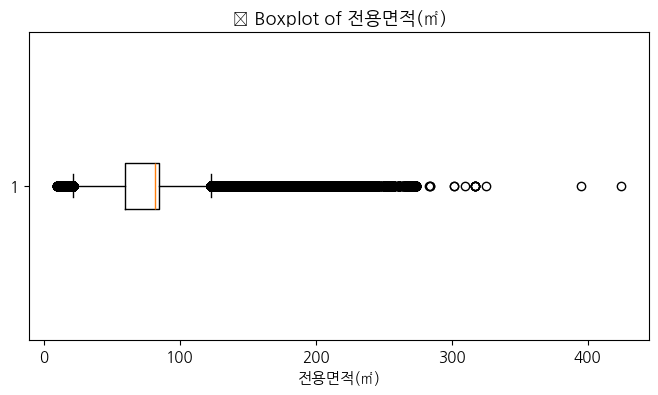

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


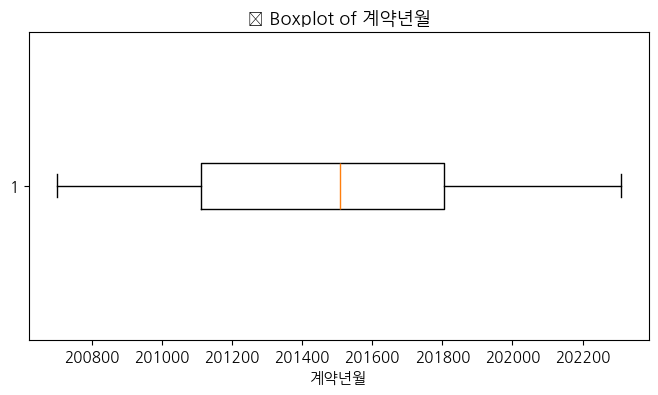

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


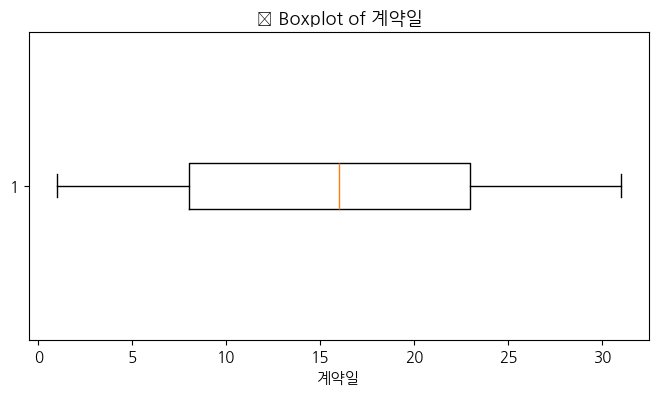

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


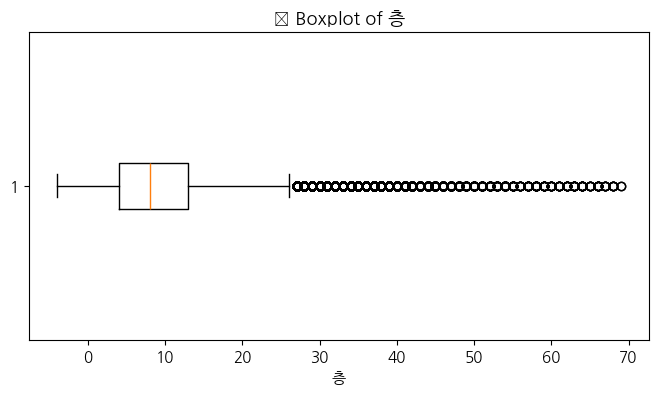

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


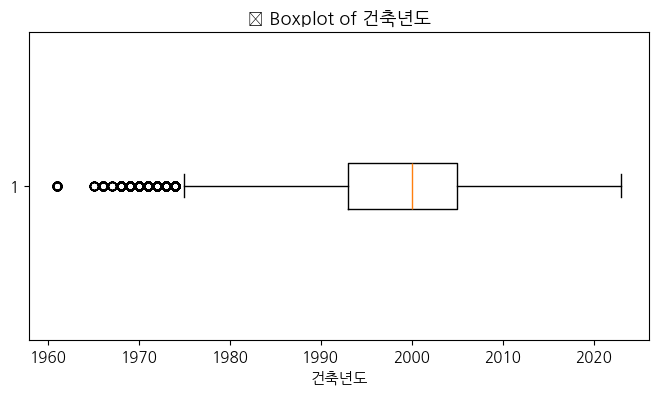

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


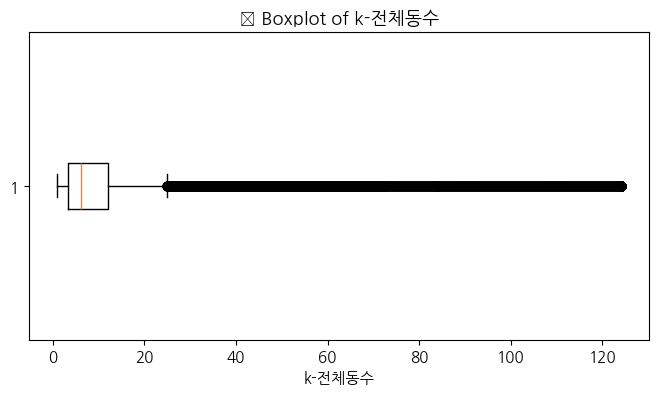

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


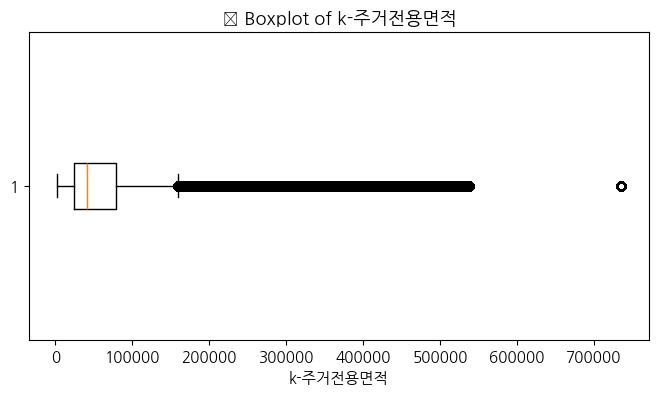

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


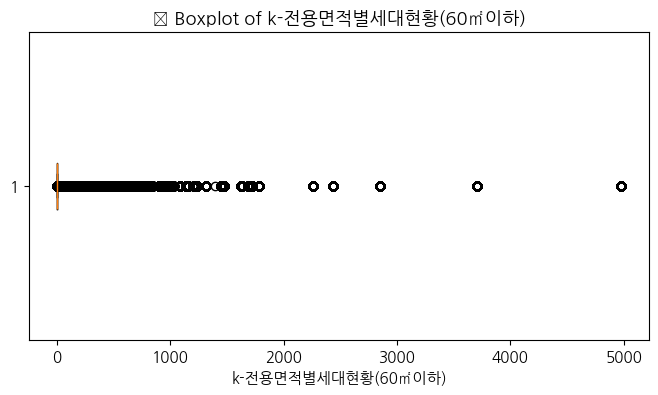

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


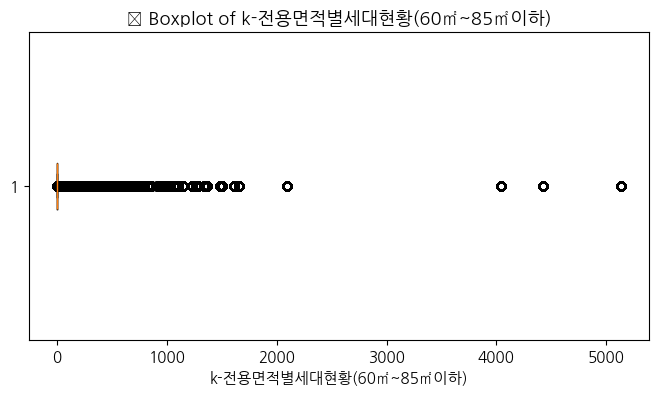

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


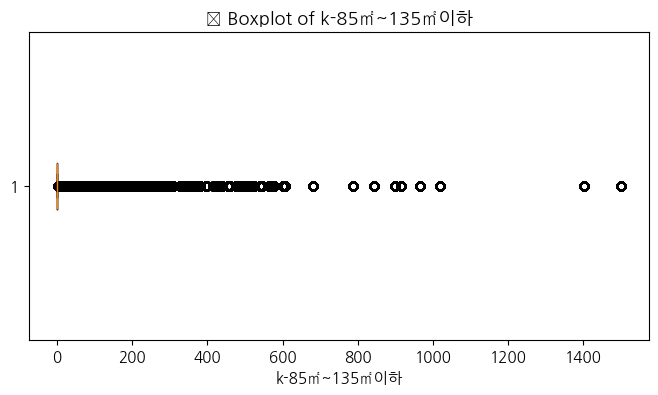

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


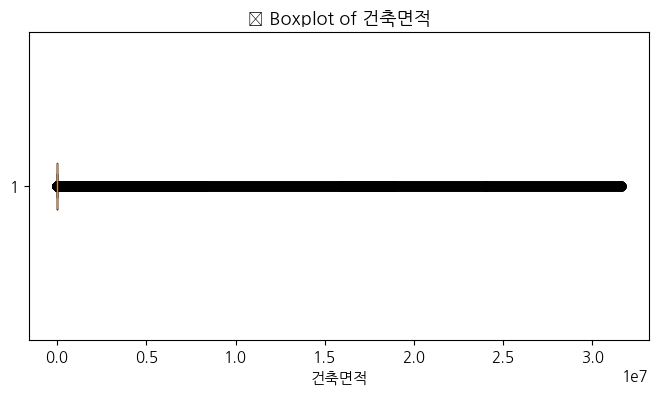

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


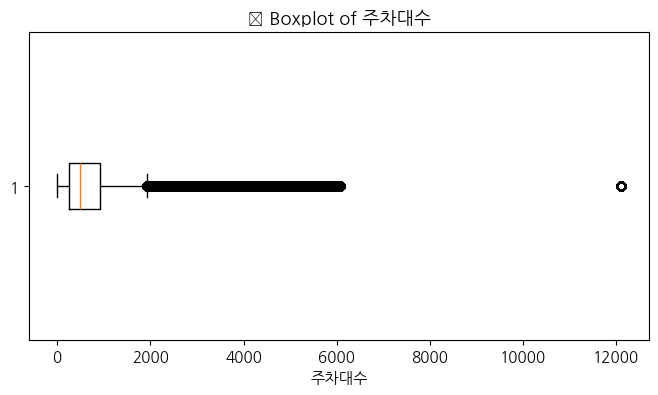

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


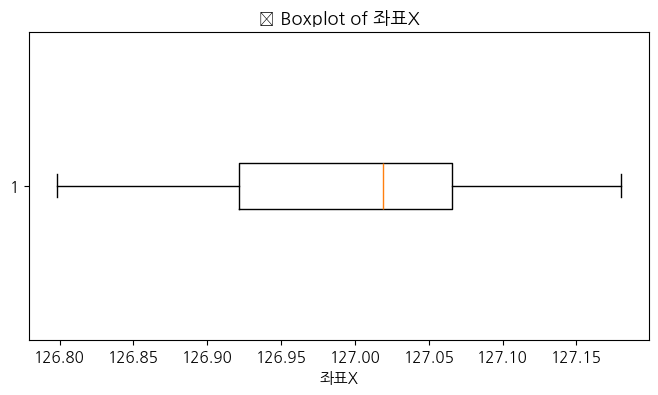

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


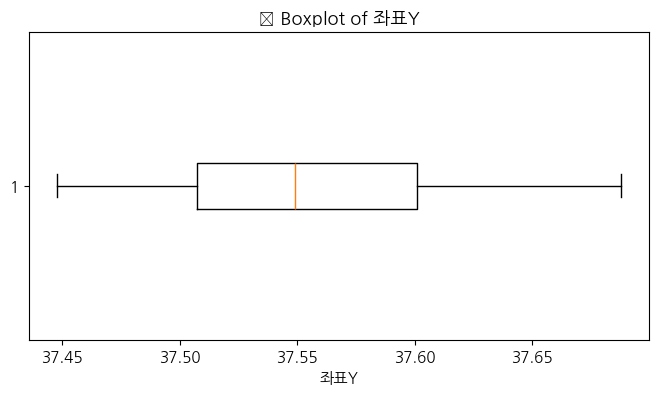

/opt/anaconda3/envs/real_estate_pred/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothicOTF.
  fig.canvas.print_figure(bytes_io, **kw)


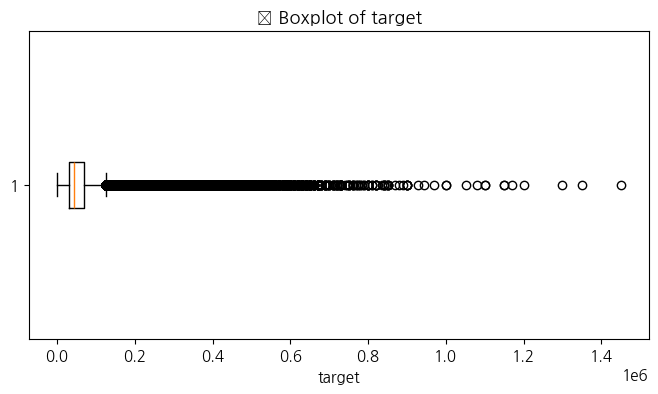

In [33]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(merged_data[col].dropna(), vert=False)
    plt.title(f'📊 Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

In [38]:
target_cols = ['건축면적', '주차대수', 'k-주거전용면적', 'k-전체동수', '전용면적(㎡)']

# 이상치 제거 함수 (train 데이터만)
def remove_outliers_iqr(df, cols):
    # 1. train 데이터만 필터링
    train_df = df[df['data_type'] == 'train'].copy()
    test_df = df[df['data_type'] != 'train'].copy()   # test 데이터는 그대로
    
    # 2. 각 변수에 대해 이상치 제거
    for col in cols:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train_df = train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]
    
    # 3. train과 test 다시 합치기
    cleaned_df = pd.concat([train_df, test_df]).sort_index()
    
    return cleaned_df

# 적용
merged_data_clean = remove_outliers_iqr(merged_data, target_cols)

In [39]:
print("Before:", merged_data.shape)
print("After:", merged_data_clean.shape)


Before: (1204322, 41)
After: (843447, 41)


In [47]:
print(merged_data['data_type'].value_counts())
print()
print(merged_data_clean['data_type'].value_counts())

data_type
train    1194407
test        9915
Name: count, dtype: int64

data_type
train    833532
test       9915
Name: count, dtype: int64


In [ ]:
merged_data_clean.to_csv('apt_data_v1_clean.csv', index=False, encoding='utf-8-sig')